In [17]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import os
import numpy as np

In [18]:
info_useful_cols = ["Language", "Level", "age", "datetime", "feedback_duration", "form_response", "inter_trial_interval","response_time","subject_nr", "time_Pre_experiment", "time_experiment"]

In [19]:
switch_params = ["baseline -> context", "context -> baseline"]
type_with_participant = {
    18 : 0,
    45 : 1,
    80 : 0,
}

In [20]:
res_files = [x for x in os.listdir(".") if "csv" in x] # read CSV files
res_files

['subject-11.csv',
 'subject-45.csv',
 'subject-80.csv',
 'subject-7.csv',
 'subject-30.csv',
 'subject-18.csv']

In [21]:
rindex = 0
# find lines with trial
with open(res_files[rindex]) as f:
    trial_lines = [i for i,x in enumerate(f.readlines()) if "trial" in x]
    bounds = [(x,x+1) for x in range(0,len(trial_lines),2)]
    trial_lines = [(trial_lines[x[0]], trial_lines[x[1]]) for x in bounds]
print(trial_lines)
temp_csv = pd.read_csv(res_files[rindex], delimiter=",")

[(0, 2), (23, 175), (327, 373)]


In [24]:
# Read the first 2 lines for participant info
participant_info = temp_csv.iloc[:1]
participant_info = participant_info[info_useful_cols]
# participant_info["order"] = switch_params[type_with_participant[int(participant_info["subject_nr"])]]
participant_info.head()

,Language,Level,age,datetime,feedback_duration,form_response,inter_trial_interval,response_time,subject_nr,time_Pre_experiment,time_experiment
0,Telugu,A1,23,Wed Oct 26 23:50:16 2022,1200.0,A1,200.0,4726.0,11.0,7583.0,2829.0


In [68]:
# Trial info
trial_cols = temp_csv.iloc[1].fillna(0)
trials = temp_csv.iloc[23:172].fillna(0)
trials.columns = trial_cols
trials = trials[trials["trial"]!=0]
trials = trials.dropna()
trials = trials.reset_index()
trials = trials.drop(["index", "trial"], axis = 1)
trials = trials[trial_cols[1:8]]
trials

1,fact,start_time,rt,correct,fact_id,question,answer
0,1090939.0,1100.0,True,1,verschrikkelijk,Ik vind het <b>verschrikkelijk</b> om voor een...,Het was een <b>verschrikkelijke</b> dag.
1,1094630.0,1409.0,True,2,zelfstandig,Het is prettig als werknemers <b>zelfstandig</...,Ik vond het in het begin moeilijk om <b>zelfst...
2,1098925.0,3561.0,True,3,gewoonte,Ik heb de slechte <b>gewoonte</b> om te laat t...,Het is een goede <b>gewoonte</b> om je handen ...
3,1105388.0,946.0,True,2,zelfstandig,Het is prettig als werknemers <b>zelfstandig</...,Ik vond het in het begin moeilijk om <b>zelfst...
4,1109686.0,1124.0,True,3,gewoonte,Ik heb de slechte <b>gewoonte</b> om te laat t...,Het is een goede <b>gewoonte</b> om je handen ...
5,1112919.0,1642.0,True,4,verwondering,Kinderen zitten vol <b>verwondering</b>.,Ik sta vol <b>verwondering</b> naar de sterren...
6,1132546.0,2001.0,True,5,bijeenkomst,SNIC is een <b>bijeenkomst</b> met studenten v...,De <b>bijeenkomst</b> begint om 10 uur.
7,1137375.0,1244.0,True,4,verwondering,Kinderen zitten vol <b>verwondering</b>.,Ik sta vol <b>verwondering</b> naar de sterren...
8,1140868.0,1323.0,True,5,bijeenkomst,SNIC is een <b>bijeenkomst</b> met studenten v...,De <b>bijeenkomst</b> begint om 10 uur.
9,1145081.0,1042.0,True,6,vriendschap,Deze <b>vriendschap</b> is erg belangrijk voor...,Een <b>vriendschap</b> moet onderhouden worden.


In [48]:
import matplotlib.pyplot as plt

In [49]:
int(False)

0

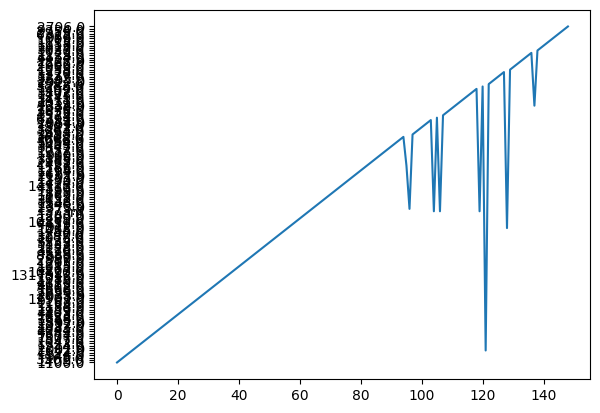

In [66]:
def WTF(x):
    if x=="False":
        return 0
    else:
        return 1
plt.plot([0 for x in ]trials["start_time"])

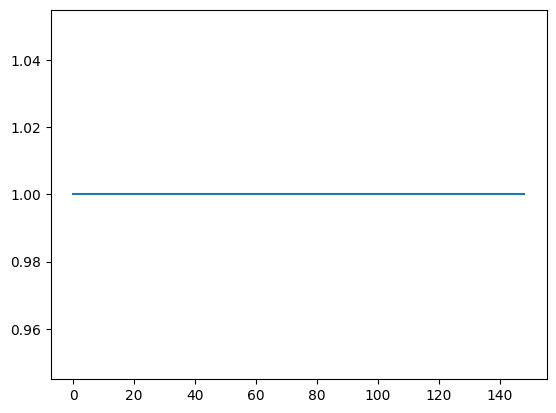

In [45]:
plt.plot(trials["rt"].astype(bool))